# PIMA Indian Diabetes Dataset 4

( Dataset removing outliers and rows
having missing values)

Machine Learning

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset

In [27]:
df = pd.read_csv('diabetes.csv')

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.shape

(768, 9)

Plot histogram of Pregnancy

In [33]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

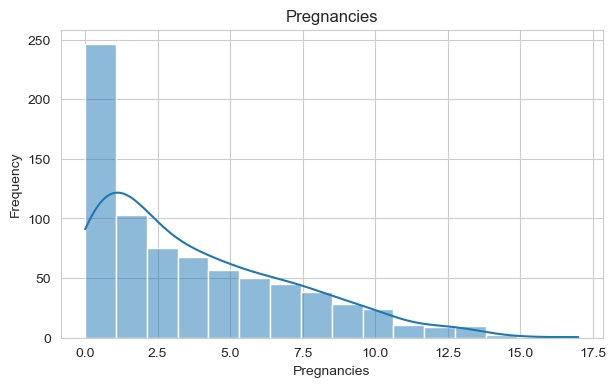

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.histplot(df['Pregnancies'],kde=True)
plt.title("Pregnancies")
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#sns.heatmap(df.corr(), annot=True)


Replace 'zero' with null

In [35]:
# Copy the first 8 columns
rows_to_impute = df.iloc[:, 1:8].copy()

# Replace zero values with NaN
rows_to_impute.replace(0, np.nan, inplace=True)

# Update df with the processed data
df.iloc[:, 1:8] = rows_to_impute
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Drop row that have null

In [36]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [37]:
df = df.dropna()
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Detect and remove outliers

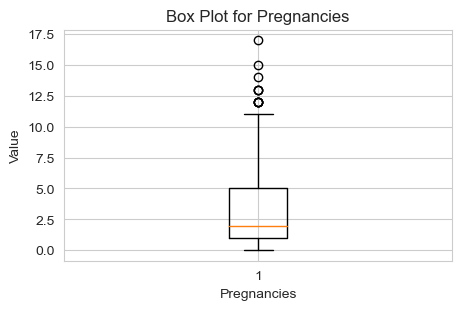

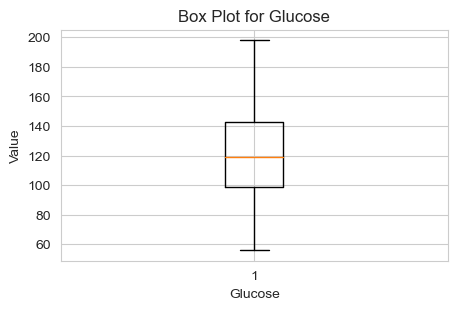

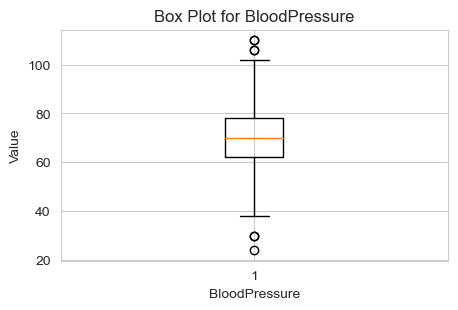

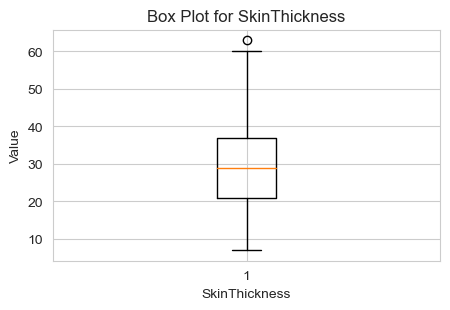

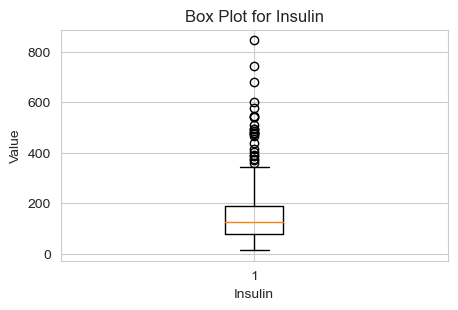

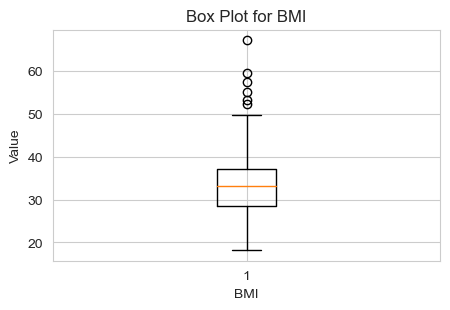

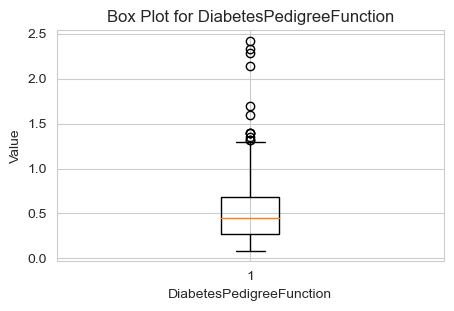

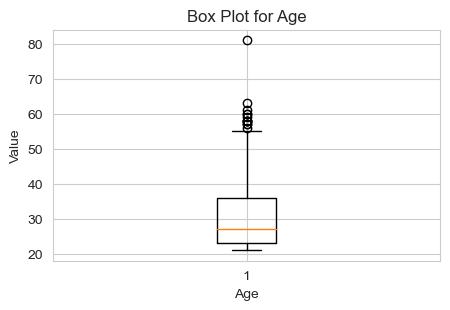

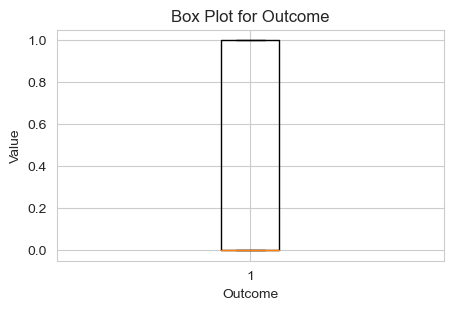

In [40]:
for col in df.columns:
  plt.figure(figsize=(5, 3)) # Create a new figure for each boxplot
  plt.boxplot(df[col])
  plt.title(f"Box Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

In [41]:
factor = 3  

def remove_outliers(df, factor):
    for column in df.columns:
        upper_lim = df[column].mean() + df[column].std() * factor
        lower_lim = df[column].mean() - df[column].std() * factor

        # Remove outliers
        df = df[(df[column] < upper_lim) & (df[column] > lower_lim)]
        print(df.shape)
    return df

In [42]:
df_cleaned = remove_outliers(df, factor)

(386, 9)
(386, 9)
(381, 9)
(380, 9)
(372, 9)
(370, 9)
(366, 9)
(363, 9)
(363, 9)


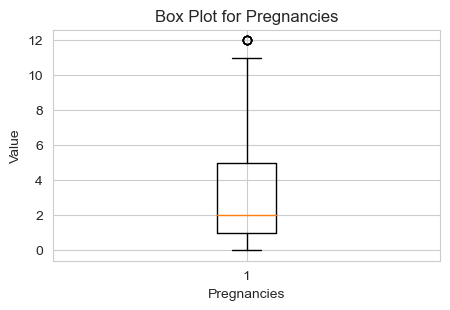

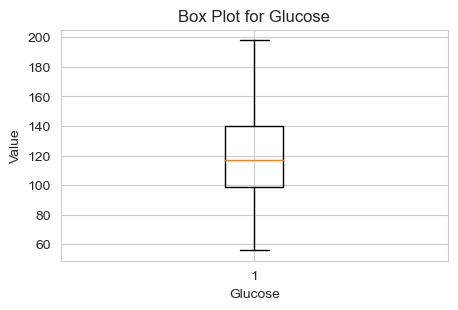

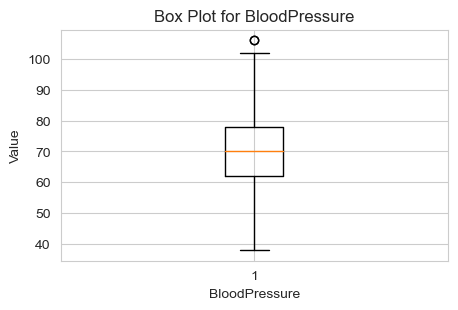

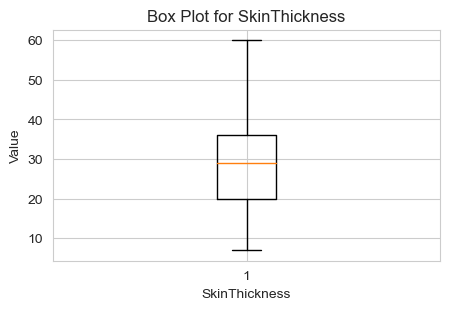

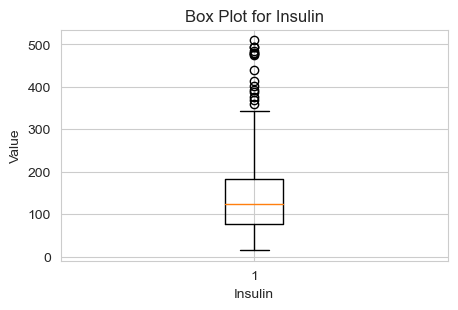

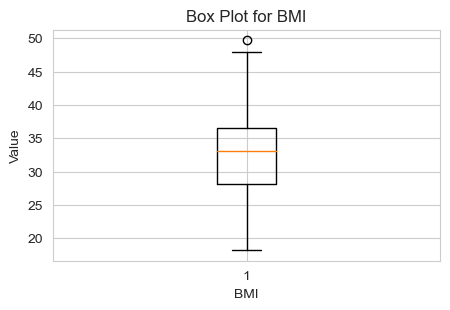

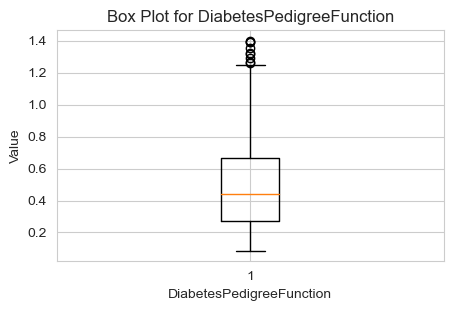

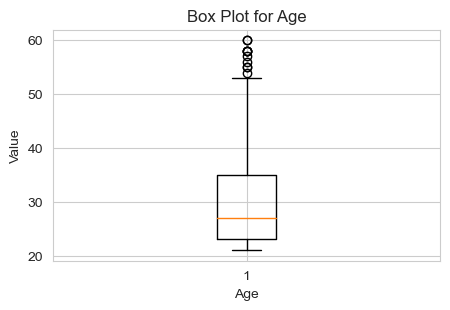

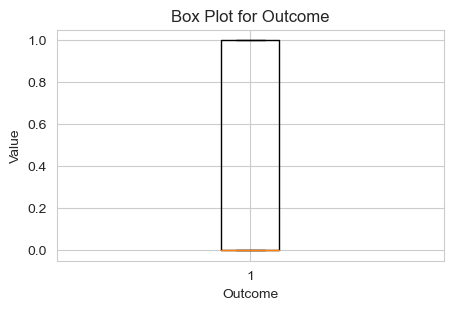

In [43]:
def plot_boxplots(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Only plot numeric columns
            # Plot the boxplot for the current column
            plt.figure(figsize=(5, 3))  # Create a new figure for each boxplot
            plt.boxplot(df[column])
            plt.title(f"Box Plot for {column}")
            plt.xlabel(column)
            plt.ylabel("Value")
            plt.grid(True)
            plt.show()

# Plot the boxplots for the cleaned DataFrame
plot_boxplots(df_cleaned)

In [44]:
df = df_cleaned

In [45]:
df.shape

(363, 9)

In [46]:
df['Outcome'].value_counts()

Outcome
0    249
1    114
Name: count, dtype: int64

Split Data 80:20

In [47]:
x = df.iloc[:,0:8] #select all rows, select columns 0 to 8
y = df['Outcome']

In [48]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32


In [49]:
y.sample(5)

25     1
19     1
405    0
356    1
486    0
Name: Outcome, dtype: int64

Random Forest

In [50]:
import csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

all_results = []

# Define specific seeds for train-test split
seeds = [1234, 5678, 9012, 3456, 7890, 48291, 71635, 20918, 36547, 10283, 94721, 53068, 87195, 61423, 25856, 13902, 78345, 42678, 96012, 30541]  

with open("RF_D4_results.csv", "a", newline="") as csvfile:
    writer = csv.writer(csvfile)

    # Write header row if the file doesn't exist
    writer.writerow(["Seed", "Accuracy", "Precision", "Recall", "F1-Score"])

    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
    
        # hyperparameter
        parameters = {
            'criterion': ['gini', 'entropy'],
            'max_features': ['sqrt'],
            'random_state': range(1, 51, 5),  # Nested random state for inner CV
            'min_samples_leaf': range(1, 51, 5),
            'n_estimators': range(1, 51, 5)
        }
    
        # Create a RandomForestClassifier object
        clf = RandomForestClassifier()
    
        # Perform GridSearchCV with specified seed
        rf_classifier = GridSearchCV(clf, parameters, cv=5, scoring='f1', n_jobs=-1, error_score='raise')
        rf_classifier.fit(X_train, y_train)
    
        # Get the best estimator and make predictions
        best_model = rf_classifier.best_estimator_
        y_pred = best_model.predict(X_test)
    
        # Evaluate the model (replace with your chosen metrics)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        writer.writerow([seed, accuracy, precision, recall, f1])
    
        print(f"Seed: {seed} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Seed: 1234 - Accuracy: 0.6849, Precision: 0.6111, Recall: 0.4074, F1-Score: 0.4889
Seed: 5678 - Accuracy: 0.7808, Precision: 0.7222, Recall: 0.5417, F1-Score: 0.6190
Seed: 9012 - Accuracy: 0.7534, Precision: 0.6800, Recall: 0.6296, F1-Score: 0.6538
Seed: 3456 - Accuracy: 0.7260, Precision: 0.6471, Recall: 0.4400, F1-Score: 0.5238
Seed: 7890 - Accuracy: 0.7671, Precision: 0.6667, Recall: 0.5833, F1-Score: 0.6222
Seed: 48291 - Accuracy: 0.7671, Precision: 0.6667, Recall: 0.5217, F1-Score: 0.5854
Seed: 71635 - Accuracy: 0.7671, Precision: 0.6000, Recall: 0.5714, F1-Score: 0.5854
Seed: 20918 - Accuracy: 0.8493, Precision: 0.7500, Recall: 0.7143, F1-Score: 0.7317
Seed: 36547 - Accuracy: 0.7808, Precision: 0.8333, Recall: 0.5357, F1-Score: 0.6522
Seed: 10283 - Accuracy: 0.6712, Precision: 0.4348, Recall: 0.4762, F1-Score: 0.4545
Seed: 94721 - Accuracy: 0.7534, Precision: 0.6000, Recall: 0.4286, F1-Score: 0.5000
Seed: 53068 - Accuracy: 0.7808, Precision: 0.6500, Recall: 0.5909, F1-Score: 0.61